In [ ]:
#installing important libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib_inline
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from mpl_finance import candlestick_ochl
from mpl_finance import candlestick_ohlc
import plotly_express as px
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
#installing libraries for data reading from yfinance

import yfinance as yf
from pandas_datareader import DataReader
from pandas_datareader import data as pdr


In [ ]:
#installing Date and Time library 

from datetime import datetime

In [ ]:
# Making a list of stocks

tech_stocks=['GOOG','AMZN','GS','META','INFY','AAPL','NFLX','MSFT']

start='2013-04-01'
end=datetime.now()


In [ ]:
"""
Downloads historical stock data using the yf.download function for the current stock symbol in the loop (stock). It then creates a global 
variable with the name of the stock symbol and assigns the downloaded data to that variable.
"""

for stock in tech_stocks:
    globals()[stock]=yf.download(stock,start,end)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list=[GOOG,AMZN,GS,META,INFY,AAPL,NFLX,MSFT]
company_name=["GOOGLE","AMAZON","GOLDMANSACHS","META","INFOSYS","AAPLE","NETFLIX","MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

#Now we have our data which can be used for analyzation


In [ ]:
df.head()

Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-04-01  19.801031  19.981356  19.757195  19.954954  19.954954   72562968  \
2013-04-02  20.038391  20.294682  20.024942  20.250097  20.250097   81966082   
2013-04-03  20.260557  20.278990  19.942001  20.079737  20.079737   69800653   
2013-04-04  20.031168  20.068527  19.708628  19.802525  19.802525   98270968   
2013-04-05  19.578115  19.601280  19.337519  19.503147  19.503147  137870844   

           company_name  
Date                     
2013-04-01       GOOGLE  
2013-04-02       GOOGLE  
2013-04-03       GOOGLE  
2013-04-04       GOOGLE  
2013-04-05       GOOGLE

In [ ]:
df=df.reindex(columns=['company_name','Open','High','Low','Close','Adj Close','Volume'])

In [ ]:
df.head()

company_name       Open       High        Low      Close   
Date                                                                  
2013-04-01       GOOGLE  19.801031  19.981356  19.757195  19.954954  \
2013-04-02       GOOGLE  20.038391  20.294682  20.024942  20.250097   
2013-04-03       GOOGLE  20.260557  20.278990  19.942001  20.079737   
2013-04-04       GOOGLE  20.031168  20.068527  19.708628  19.802525   
2013-04-05       GOOGLE  19.578115  19.601280  19.337519  19.503147   

            Adj Close     Volume  
Date                              
2013-04-01  19.954954   72562968  
2013-04-02  20.250097   81966082  
2013-04-03  20.079737   69800653  
2013-04-04  19.802525   98270968  
2013-04-05  19.503147  137870844

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21624 entries, 2013-04-01 to 2023-12-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  21624 non-null  object 
 1   Open          21624 non-null  float64
 2   High          21624 non-null  float64
 3   Low           21624 non-null  float64
 4   Close         21624 non-null  float64
 5   Adj Close     21624 non-null  float64
 6   Volume        21624 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df.tail()

company_name        Open        High         Low       Close   
Date                                                                      
2023-12-15    MICROSOFT  366.850006  372.399994  366.279999  370.730011  \
2023-12-18    MICROSOFT  369.450012  373.000000  368.679993  372.649994   
2023-12-19    MICROSOFT  371.489990  373.260010  369.839996  373.260010   
2023-12-20    MICROSOFT  375.000000  376.029999  370.529999  370.619995   
2023-12-21    MICROSOFT  372.559998  374.410004  370.040009  373.540009   

             Adj Close    Volume  
Date                              
2023-12-15  370.730011  78478200  
2023-12-18  372.649994  21802900  
2023-12-19  373.260010  20603700  
2023-12-20  370.619995  26316700  
2023-12-21  373.540009  17693500

In [ ]:
df.describe()

Open          High           Low         Close     Adj Close   
count  21624.000000  21624.000000  21624.000000  21624.000000  21624.000000  \
mean     129.322695    130.881155    127.756036    129.358679    125.479598   
std      118.895575    120.443799    117.301112    118.897712    117.124743   
min        4.945000      4.945000      4.863750      4.901250      3.780593   
25%       34.546249     34.935000     34.303928     34.647876     32.082405   
50%       94.839996     95.860001     93.550003     94.655003     94.169998   
75%      185.433121    187.330002    183.330006    185.302502    177.160954   
max      692.349976    700.989990    686.090027    691.690002    691.690002   

             Volume  
count  2.162400e+04  
mean   4.428435e+07  
std    6.360806e+07  
min    1.584340e+05  
25%    8.629600e+06  
50%    2.355260e+07  
75%    5.376462e+07  
max    1.065523e+09

In [ ]:
AMZN.head()

Open     High      Low    Close  Adj Close    Volume   
Date                                                                  
2013-04-01  13.3490  13.3700  13.0505  13.0805    13.0805  50496000  \
2013-04-02  13.1200  13.2945  13.0275  13.1660    13.1660  52622000   
2013-04-03  13.1060  13.1835  12.8875  12.9515    12.9515  48276000   
2013-04-04  12.9615  13.0205  12.8060  12.9540    12.9540  39288000   
2013-04-05  12.7860  12.8090  12.6835  12.7740    12.7740  51148000   

           company_name  
Date                     
2013-04-01       AMAZON  
2013-04-02       AMAZON  
2013-04-03       AMAZON  
2013-04-04       AMAZON  
2013-04-05       AMAZON

In [ ]:
AMZN.describe()

Open         High          Low        Close    Adj Close   
count  2703.000000  2703.000000  2703.000000  2703.000000  2703.000000  \
mean     79.401739    80.322751    78.395440    79.377656    79.377656   
std      52.608160    53.257112    51.900472    52.570212    52.570212   
min      12.447000    12.646500    12.287500    12.411500    12.411500   
25%      28.487750    28.883500    27.960250    28.523500    28.523500   
50%      81.762497    82.899498    80.704498    81.820000    81.820000   
75%     122.240749   123.713249   119.980000   121.981251   121.981251   
max     187.199997   188.654007   184.839493   186.570496   186.570496   

             Volume  
count  2.703000e+03  
mean   7.858389e+07  
std    4.136112e+07  
min    1.762600e+07  
25%    5.284275e+07  
50%    6.702800e+07  
75%    9.075400e+07  
max    4.771220e+08

In [ ]:
INFY.head()

Open     High      Low    Close  Adj Close    Volume   
Date                                                                  
2013-04-01  6.74250  6.74375  6.64375  6.66125   5.077845   8900000  \
2013-04-02  6.77875  6.85625  6.74250  6.77625   5.165510  11604800   
2013-04-03  6.77000  6.80875  6.68000  6.70500   5.111195  11544800   
2013-04-04  6.57500  6.59375  6.52375  6.56875   5.007333  11880000   
2013-04-05  6.46125  6.51500  6.39625  6.50375   4.957783   7568000   

           company_name  
Date                     
2013-04-01      INFOSYS  
2013-04-02      INFOSYS  
2013-04-03      INFOSYS  
2013-04-04      INFOSYS  
2013-04-05      INFOSYS

In [ ]:
INFY.describe()

Open         High          Low        Close    Adj Close   
count  2703.000000  2703.000000  2703.000000  2703.000000  2703.000000  \
mean     11.706650    11.804784    11.611628    11.710938    10.537092   
std       5.221711     5.264786     5.181313     5.225079     5.456132   
min       4.945000     4.945000     4.863750     4.901250     3.780593   
25%       7.795000     7.861250     7.740000     7.807500     6.380167   
50%       9.285000     9.385000     9.205000     9.300000     8.016786   
75%      16.530001    16.685000    16.410000    16.585000    16.168388   
max      26.150000    26.389999    25.580000    26.200001    24.964008   

             Volume  
count  2.703000e+03  
mean   1.048501e+07  
std    6.825087e+06  
min    1.068400e+06  
25%    6.594850e+06  
50%    8.860200e+06  
75%    1.240590e+07  
max    1.475912e+08

In [ ]:
for columns in company_list:
    columns.reset_index(level=0, inplace=True) 

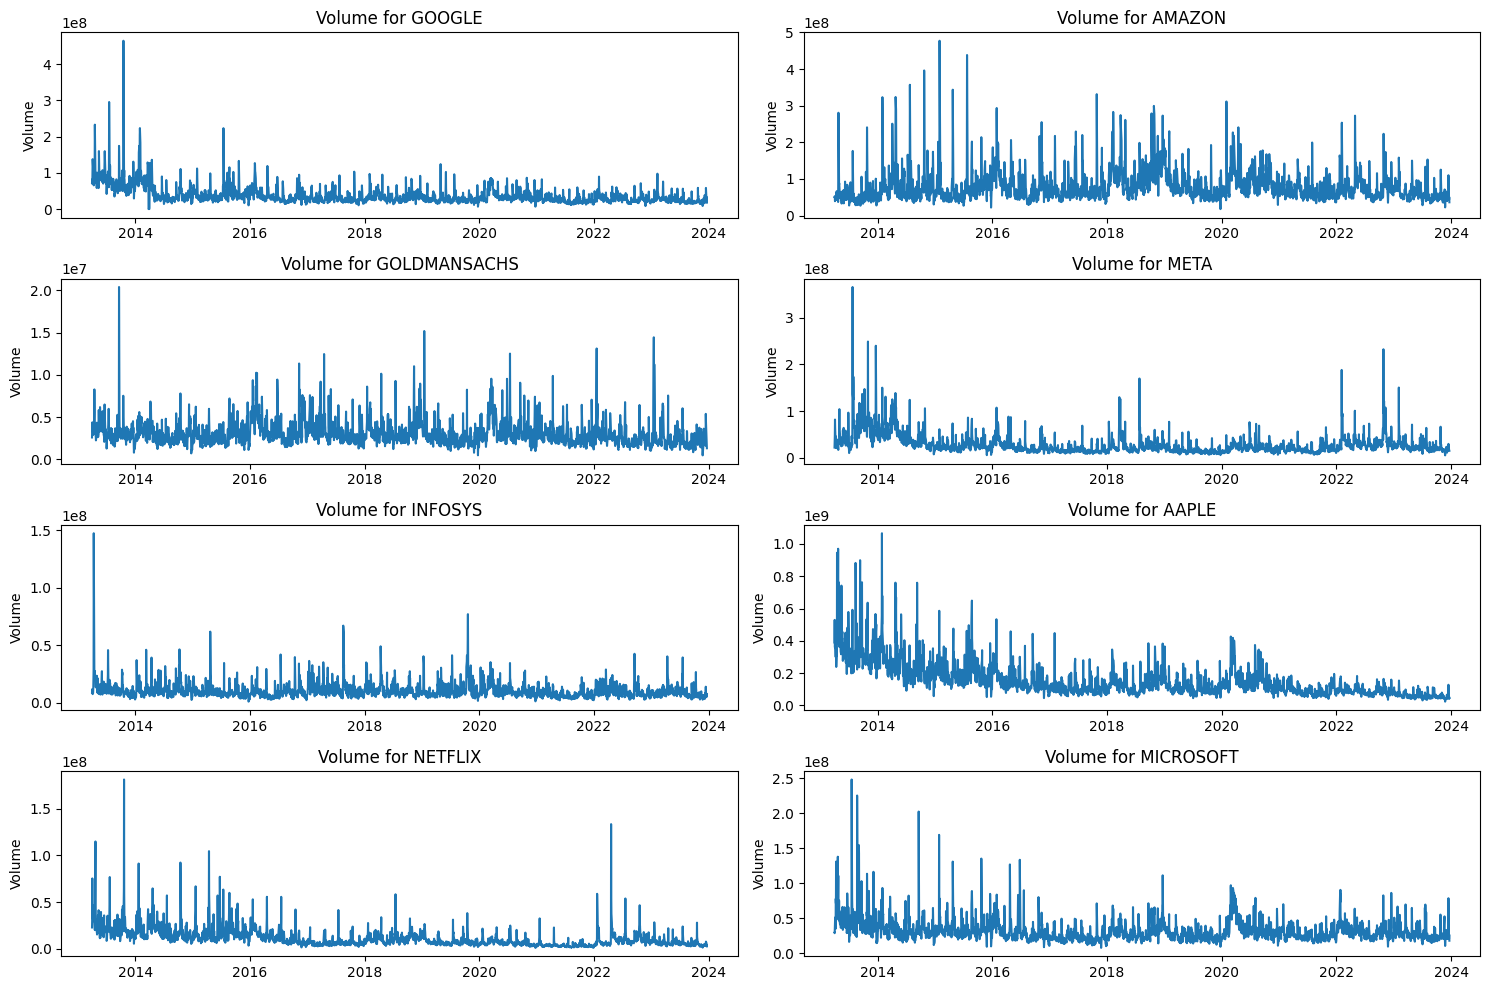

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    plt.plot(company['Date'],company['Volume'],label='line')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume for {company_name[i - 1]}")
    
plt.tight_layout()

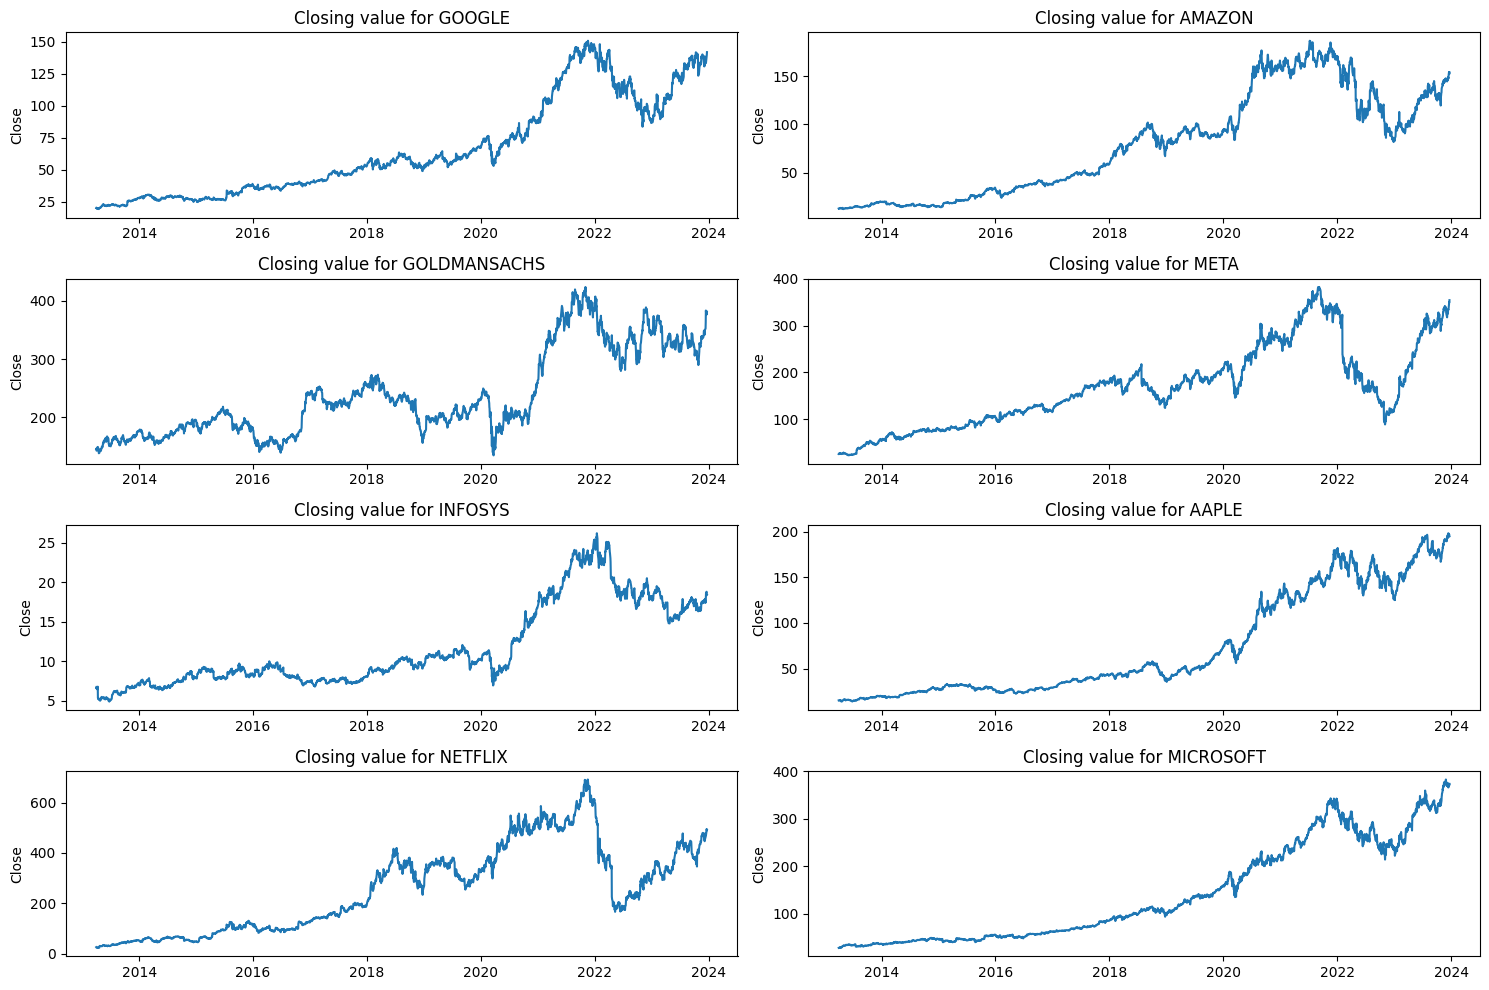

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    plt.plot(company['Date'],company['Close'],label='line')
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing value for {company_name[i - 1]}")
    
plt.tight_layout()

In [ ]:
#Adding another column of Growth in the dataframe

df['Growth']=(df['Close']-df['Open'])/df['Open']
for i,company in enumerate(company_list,1):
    company['Growth']=(company['Close']-company['Open'])/company['Open']

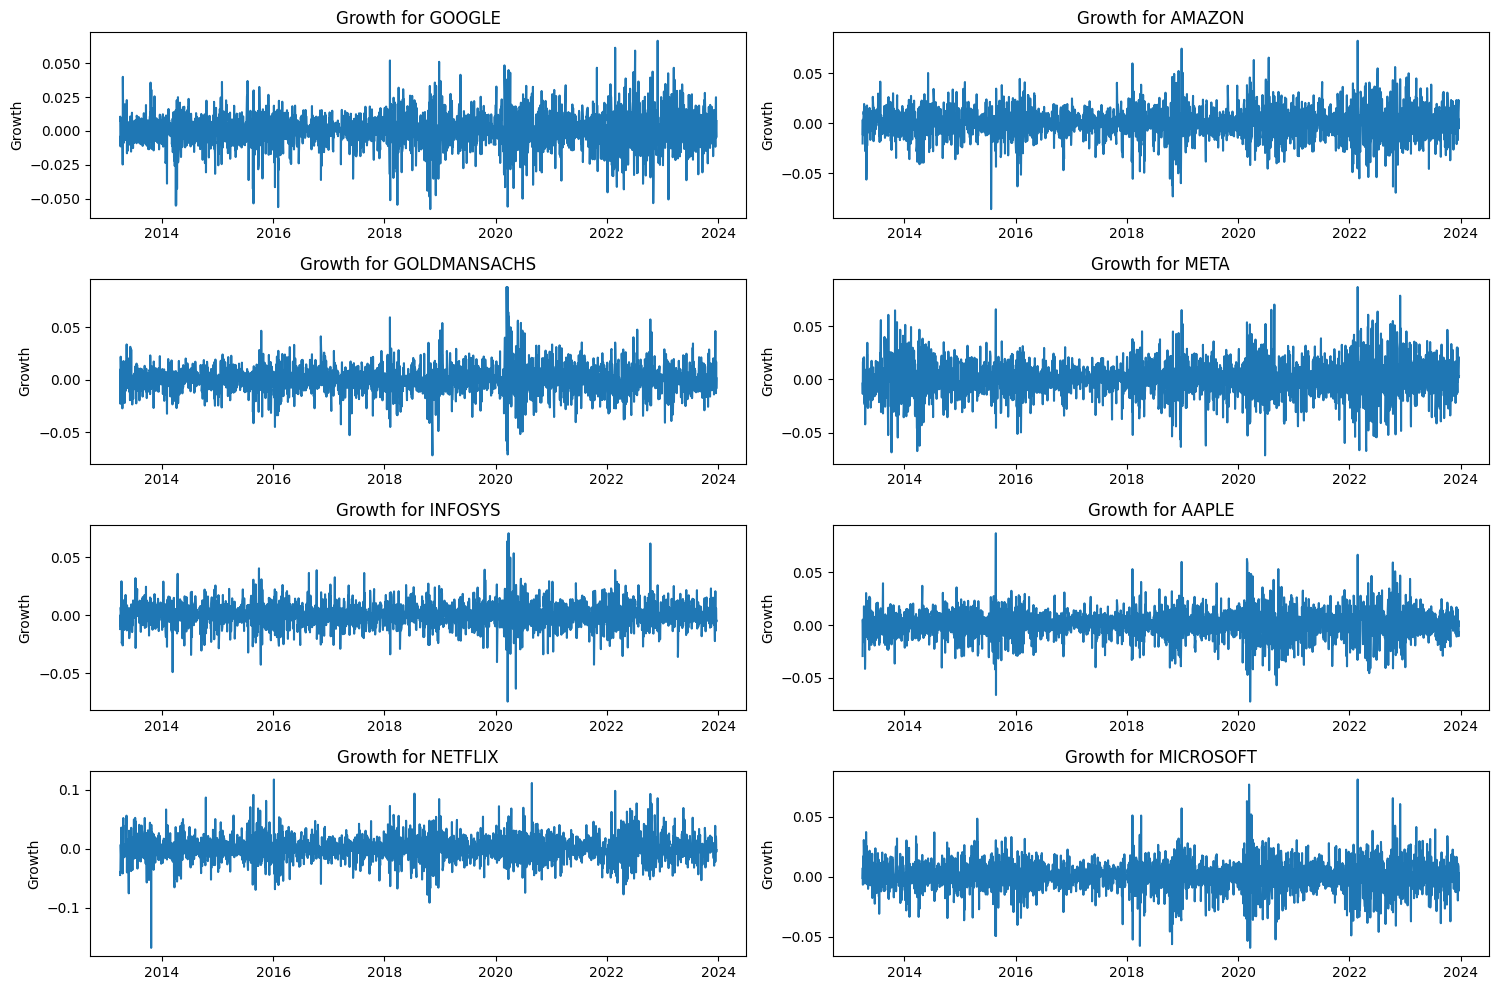

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    plt.plot(company['Date'],company['Growth'],label='line')
    plt.ylabel('Growth')
    plt.xlabel(None)
    plt.title(f"Growth for {company_name[i - 1]}")
    
plt.tight_layout()
    

In [ ]:

for i ,company in enumerate(company_list,1):
     fig = go.Figure(data=[go.Candlestick(x=company['Date'],
                open=company['Open'],
                high=company['High'],
                low=company['Low'],
                close=company['Close'])])
     fig.update_layout(
     title=company_name[i-1],
     yaxis_title='Stock',
     )
     fig.show()
     

In [ ]:
AAPL=AAPL.set_index('Date')
AAPL=AAPL.drop(columns='company_name')
AAPL.head()

Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-04-01  15.782143  15.846429  15.276429  15.318214  13.176600  389732000  \
2013-04-02  15.271429  15.647857  15.228571  15.349643  13.203636  529519200   
2013-04-03  15.406071  15.617143  15.368214  15.428214  13.271222  363216000   
2013-04-04  15.491429  15.535714  15.187500  15.275714  13.140041  358447600   
2013-04-05  15.160714  15.176786  14.988571  15.114286  13.001187  383695200   

              Growth  
Date                  
2013-04-01 -0.029396  
2013-04-02  0.005122  
2013-04-03  0.001437  
2013-04-04 -0.013925  
2013-04-05 -0.003062

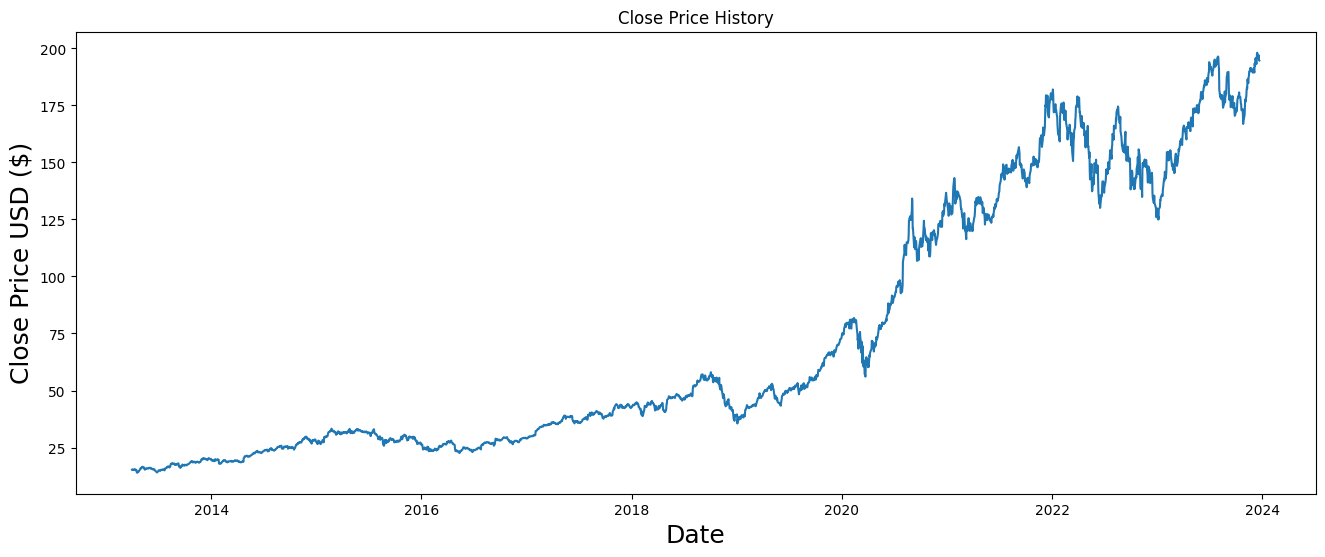

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(AAPL['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training_data_len), :]

In [ ]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
fig2=plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()